In [61]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [62]:
credit = pd.read_csv("creditcard.csv")
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [63]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [64]:
credit.drop_duplicates(inplace=True)

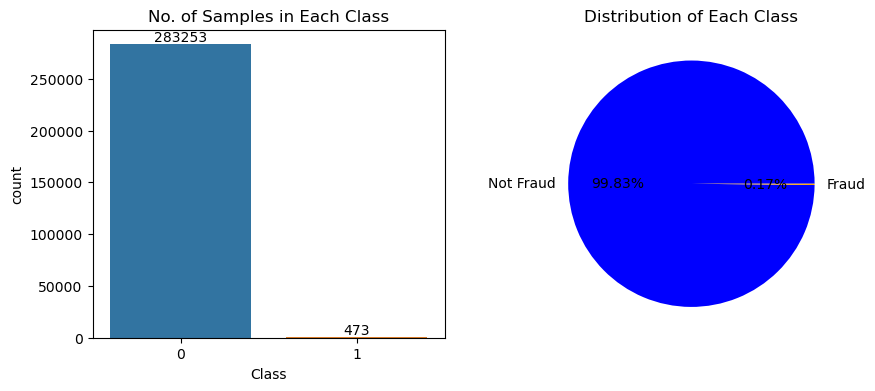

In [65]:
fig = plt.figure(figsize= (10,4))

credit_class = credit.Class.value_counts()

plt.subplot(1, 2, 1)
plt.title("No. of Samples in Each Class")
ax = sb.countplot(x = credit.Class, orient = 'v')
ax.bar_label(container = ax.containers[0], labels = credit_class.values)

plt.subplot(1, 2, 2)
plt.title("Distribution of Each Class")
plt.pie(credit_class, labels = ['Not Fraud', 'Fraud'], autopct = "%.2f%%", colors = ['b', 'orange'] )
plt.show()

### Since the distribution is highly unbalanced, so to balance, we will first down-sample the data using **RandomUnderSampler** and then, we will use Over-sampling technique called **SMOTE** to balance it.

In [66]:
X = credit.drop('Class', axis = 1)
y = credit['Class']

rus = RandomUnderSampler(sampling_strategy=0.1, random_state = 40)
X_resampled, y_resampled = rus.fit_resample(X, y)

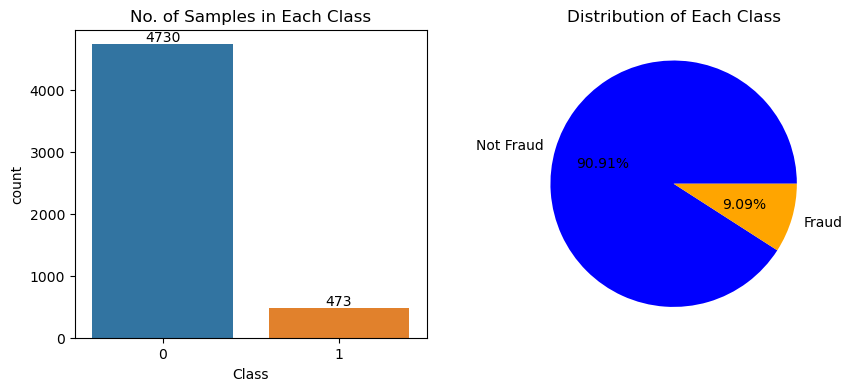

In [67]:
fig = plt.figure(figsize= (10,4))

plt.subplot(1, 2, 1)
plt.title("No. of Samples in Each Class")
ax = sb.countplot(x = y_resampled)
ax.bar_label(container = ax.containers[0], labels = y_resampled.value_counts().values)

plt.subplot(1, 2, 2)
credit_class = y_resampled.value_counts()
plt.title("Distribution of Each Class")
plt.pie(credit_class, labels = ['Not Fraud', 'Fraud'], autopct = "%.2f%%", colors = ['b', 'orange'])
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size = 0.8, test_size = 0.2, random_state = 40)

smote = SMOTE()
X_new_train, y_new_train = smote.fit_resample(X_train, y_train)

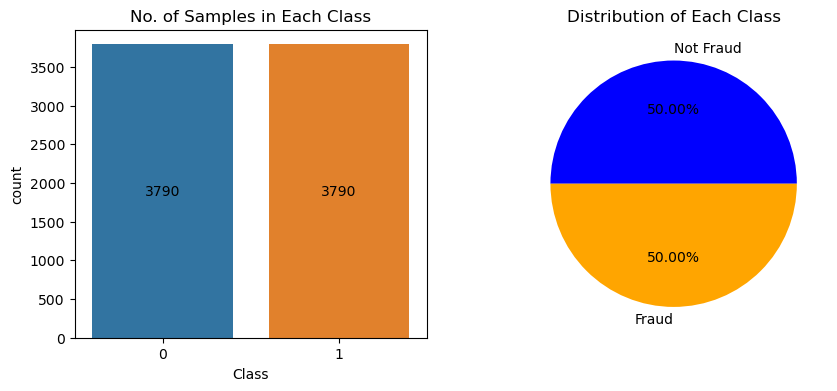

In [69]:
fig = plt.figure(figsize= (10,4))

plt.subplot(1, 2, 1)
plt.title("No. of Samples in Each Class")
ax = sb.countplot(x = y_new_train)
ax.bar_label(container = ax.containers[0], labels = y_new_train.value_counts().values, label_type = 'center')

plt.subplot(1, 2, 2)
credit_class = y_new_train.value_counts()
plt.title("Distribution of Each Class")
plt.pie(credit_class, labels = ['Not Fraud', 'Fraud'], autopct = "%.2f%%", colors = ['b', 'orange'])
plt.show()

#### We can see that the values of columns **"Time"** & **"Amount"** are in very high range so, we need to bring these values in acceptable range, we will Scale this using **StandardScaler**

In [70]:
ss = StandardScaler()
Xt_train = ss.fit_transform(X_new_train)
Xt_test = ss.transform(X_test)

In [71]:
knn_model = KNeighborsClassifier()
c_score = cross_val_score(knn_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.98350923 0.98087071 0.9848285  0.97823219 0.98680739]
Mean Cross Validation Score:  0.9828496042216359
Standard Deviation of Cross Val. Score:  0.003008378430340727


In [72]:
lr_model = LogisticRegression()
c_score = cross_val_score(lr_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.95646438 0.97757256 0.98087071 0.96965699 0.97559367]
Mean Cross Validation Score:  0.9720316622691293
Standard Deviation of Cross Val. Score:  0.008596482616171453


In [73]:
dtc_model = DecisionTreeClassifier(random_state = 40)
c_score = cross_val_score(dtc_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.96108179 0.97295515 0.97427441 0.96701847 0.96899736]
Mean Cross Validation Score:  0.9688654353562004
Standard Deviation of Cross Val. Score:  0.004690340061907976


In [74]:
rfc_model = RandomForestClassifier(random_state = 40)
c_score = cross_val_score(rfc_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.97889182 0.98746702 0.99340369 0.98878628 0.99340369]
Mean Cross Validation Score:  0.9883905013192612
Standard Deviation of Cross Val. Score:  0.0053197480616506195


In [75]:
xgb_model = xgb.XGBClassifier(eval_metric = 'logloss', random_state = 42)
c_score = cross_val_score(xgb_model, Xt_train, y_new_train, cv = 5, scoring = 'accuracy')

print("Cross Validation score: ", c_score)
print("Mean Cross Validation Score: ", c_score.mean())
print("Standard Deviation of Cross Val. Score: ", np.std(c_score))

Cross Validation score:  [0.98680739 0.9914248  0.99604222 0.99076517 0.99472296]
Mean Cross Validation Score:  0.9919525065963061
Standard Deviation of Cross Val. Score:  0.0032422706404866687


#### Since these models shows best scores but taking standard deviation and Cross-Score both, **XGBoost- XGBClassifier** performs best.
#### So, we hyper-parameter tuning will be done to get best parameters

In [76]:
xgb_model = xgb.XGBClassifier(eval_metric = 'logloss',colsample_bytree = 0.675, subsample = 0.9, learning_rate=0.15, random_state = 40)
xgb_model.fit(Xt_train, y_new_train)

y_train_pred = xgb_model.predict(Xt_train)
y_test_pred = xgb_model.predict(Xt_test)
train_acc = accuracy_score(y_new_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Classifier Train Accuracy: {train_acc}")
print(f"XGBoost Classifier Test Accuracy: {test_acc}")

XGBoost Classifier Train Accuracy: 1.0
XGBoost Classifier Test Accuracy: 0.9855907780979827


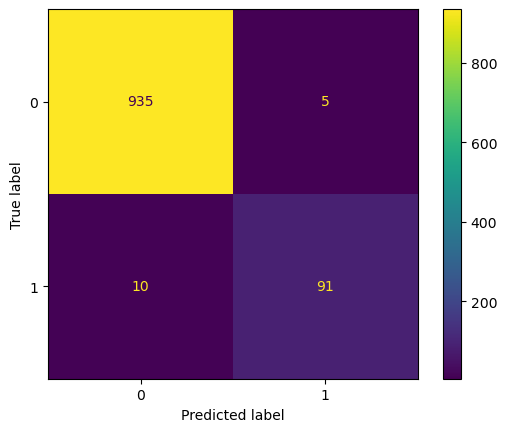

In [77]:
conf_matx = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matx)
cmd.plot()

In [106]:
xgb_model = xgb.XGBClassifier(n_estimators = 200, eval_metric = 'logloss', colsample_bytree = 0.4, subsample = 0.9, learning_rate = 0.1, random_state = 40)
xgb_model.fit(Xt_train, y_new_train)

y_train_pred = xgb_model.predict(Xt_train)
y_test_pred = xgb_model.predict(Xt_test)
train_acc = accuracy_score(y_new_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Classifier Train Accuracy: {train_acc}")
print(f"XGBoost Classifier Test Accuracy: {test_acc}")

XGBoost Classifier Train Accuracy: 1.0
XGBoost Classifier Test Accuracy: 0.9884726224783862


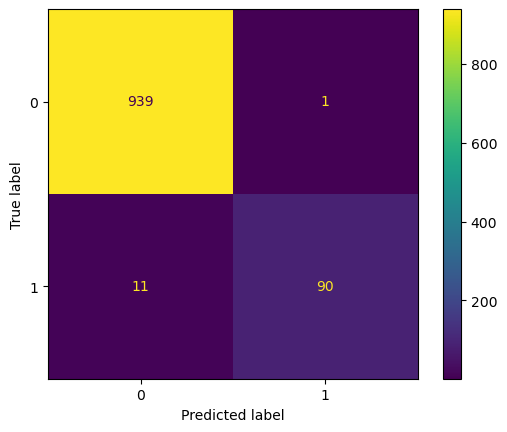

In [107]:
conf_matx = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matx)
cmd.plot()

XGBoost Classifier Train Accuracy: 1.0
XGBoost Classifier Test Accuracy: 0.9875120076849183


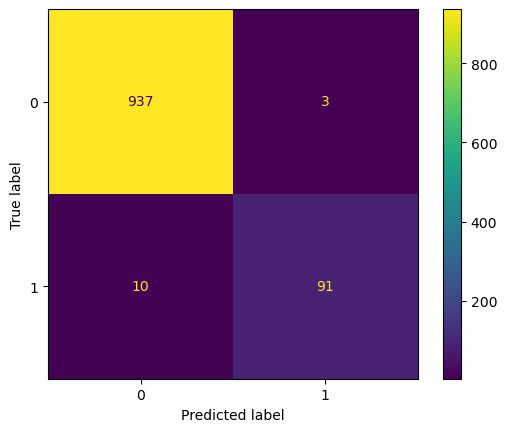

In [121]:
xgb_model = xgb.XGBClassifier(n_estimators = 200, eval_metric = 'logloss', gamma = 0.4, 
                              colsample_bytree = 0.4, subsample = 0.9, learning_rate = 0.1,
                              reg_alpha = 0.3, random_state = 40)
xgb_model.fit(Xt_train, y_new_train)

y_train_pred = xgb_model.predict(Xt_train)
y_test_pred = xgb_model.predict(Xt_test)
train_acc = accuracy_score(y_new_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Classifier Train Accuracy: {train_acc}")
print(f"XGBoost Classifier Test Accuracy: {test_acc}")

conf_matx = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matx)
cmd.plot()

### From the above 3 models, we found that last XGBclassifier model performs better as Confusion matrix shows that False-Negative value is lesser than the previous 2 models irrespective of Total False predictions.
### Since in case of Fraud, if a transcation identified as Not Fraud, but originally, it was a Fraud is dangerous, and If its Not Fraud, and identified as Fraud can be good, this can be rectified after further investigation on transaction, but cannot be done in previous case.

### **Best Fit Model**

XGBoost Classifier Train Accuracy: 1.0
XGBoost Classifier Test Accuracy: 0.9875120076849183

*****************************************************************

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       940
           1       0.97      0.90      0.93       101

    accuracy                           0.99      1041
   macro avg       0.98      0.95      0.96      1041
weighted avg       0.99      0.99      0.99      1041



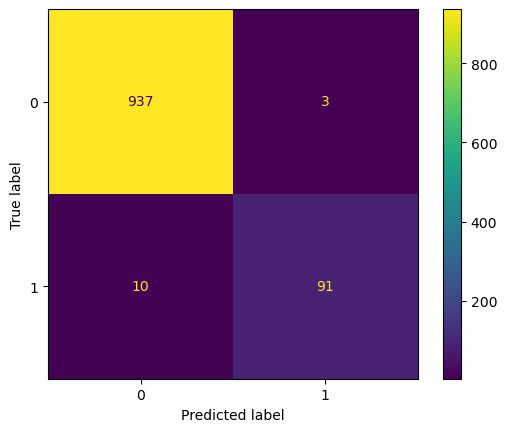

In [125]:
xgb_model = xgb.XGBClassifier(n_estimators = 200, eval_metric = 'logloss', gamma = 0.4, 
                              colsample_bytree = 0.4, subsample = 0.9, learning_rate = 0.15,
                              reg_alpha = 0.3, random_state = 40)
xgb_model.fit(Xt_train, y_new_train)

y_train_pred = xgb_model.predict(Xt_train)
y_test_pred = xgb_model.predict(Xt_test)
train_acc = accuracy_score(y_new_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"XGBoost Classifier Train Accuracy: {train_acc}")
print(f"XGBoost Classifier Test Accuracy: {test_acc}")

print("\n*****************************************************************\n")

creport = classification_report(y_test,y_test_pred)
print(creport)

conf_matx = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matx)
cmd.plot()

In [126]:
def prediction(sample):
    test = ss.transform(sample)
    pred = xgb_model.predict(test)
    sample['Class Predicted'] = pred
    sample.to_csv("Fraud Prediction.csv", index = False)
    print("DONE")

In [127]:
sample = pd.read_excel("Test Sample.xlsx")
prediction(sample)

DONE
